# Data Preprocessing

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
data=pd.read_csv('IRIS.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# ONE HOT ENCODING

In [20]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['species']=lb.fit_transform(data['species'])

In [21]:
data['species'].unique()

array([0, 1, 2])

In [22]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [26]:
x=data.drop('species',inplace=False,axis=1)
y=data['species']

# Data visualization

[Text(0, 0, 'Iris-setosa'),
 Text(1, 0, 'Iris-versicolor'),
 Text(2, 0, 'Iris-virginica')]

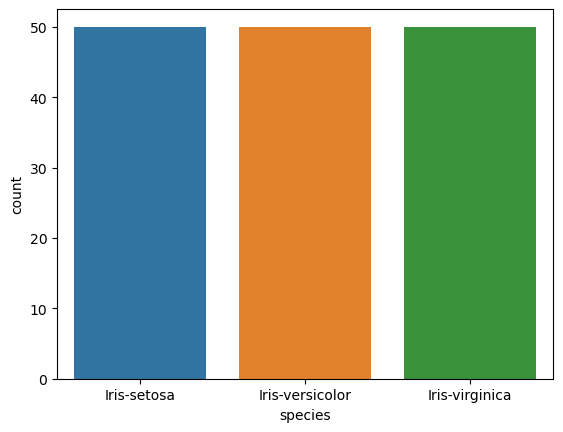

In [66]:
import seaborn as sns
ax=sns.countplot(x=data['species'])
ax.set_xticklabels(['Iris-setosa','Iris-versicolor','Iris-virginica'])

<AxesSubplot:>

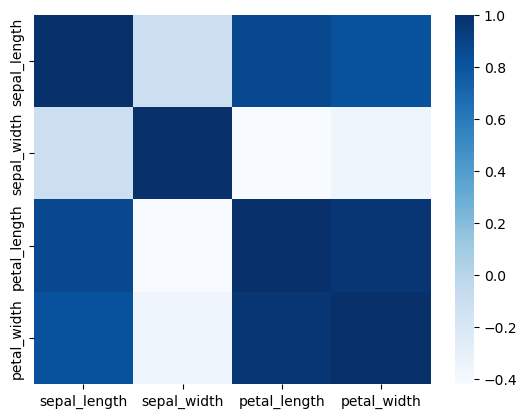

In [91]:
corr=data.corr()
sns.heatmap(corr,cmap='Blues')

# Train test split

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# SVM

In [50]:
from sklearn.svm import SVC
svm_model=SVC(kernel='linear')
svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_train)
y_pred_test=svm_model.predict(x_test)

In [49]:
y_pred.shape,y_test.shape

((120,), (30,))

In [51]:
from sklearn.metrics import classification_report
print("Training data's evaluation metrics\n"+classification_report(y_train,y_pred))
print("Testing data's evaluation metrics\n"+classification_report(y_test,y_pred_test))

Training data's evaluation metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.95      0.96        41
           2       0.95      0.97      0.96        39

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

Testing data's evaluation metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [52]:
from sklearn.svm import SVC
svm_model=SVC(kernel='poly')
svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_train)
y_pred_test=svm_model.predict(x_test)

In [53]:
from sklearn.metrics import classification_report
print("Training data's evaluation metrics\n"+classification_report(y_train,y_pred))
print("Testing data's evaluation metrics\n"+classification_report(y_test,y_pred_test))

Training data's evaluation metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.95      0.97        41
           2       0.95      1.00      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

Testing data's evaluation metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



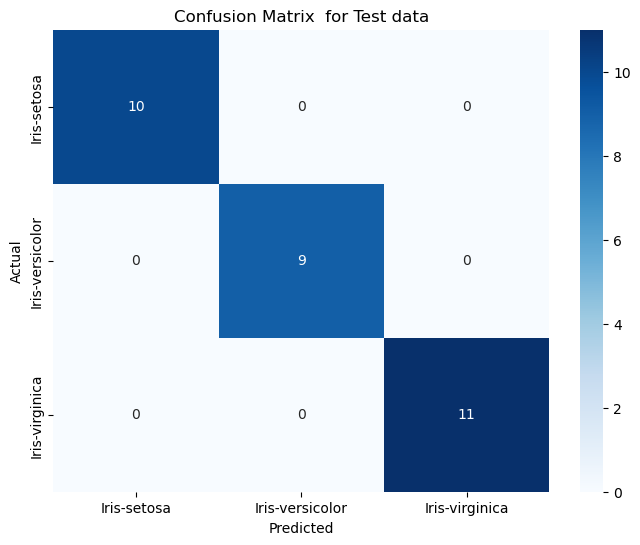

In [82]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True, fmt='d', cmap='Blues', xticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix  for Test data')
plt.show()

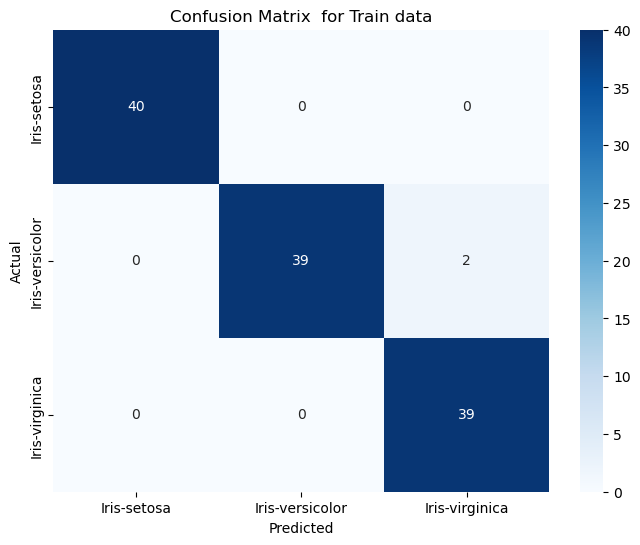

In [83]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train,y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix  for Train data')
plt.show()

# Random Forest classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=20)
model.fit(x_train,y_train)
y_pred=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [60]:
from sklearn.metrics import classification_report
print("Training data's evaluation metrics\n"+classification_report(y_train,y_pred))
print("Testing data's evaluation metrics\n"+classification_report(y_test,y_pred_test))

Training data's evaluation metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.95      0.97        41
           2       0.95      1.00      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

Testing data's evaluation metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



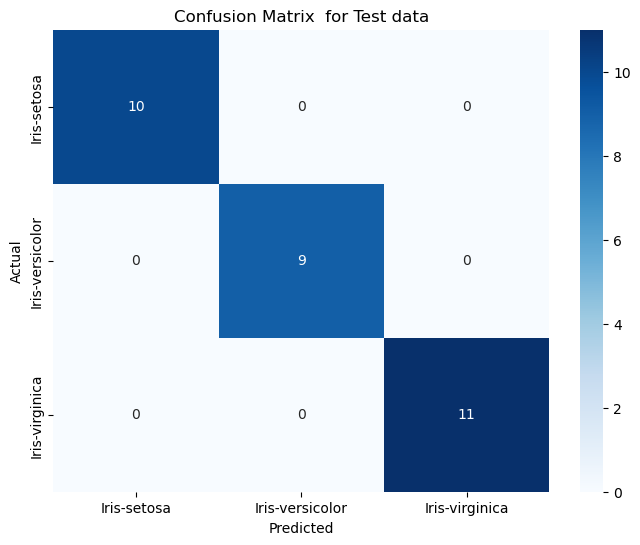

In [78]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True, fmt='d', cmap='Blues', xticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix  for Test data')
plt.show()

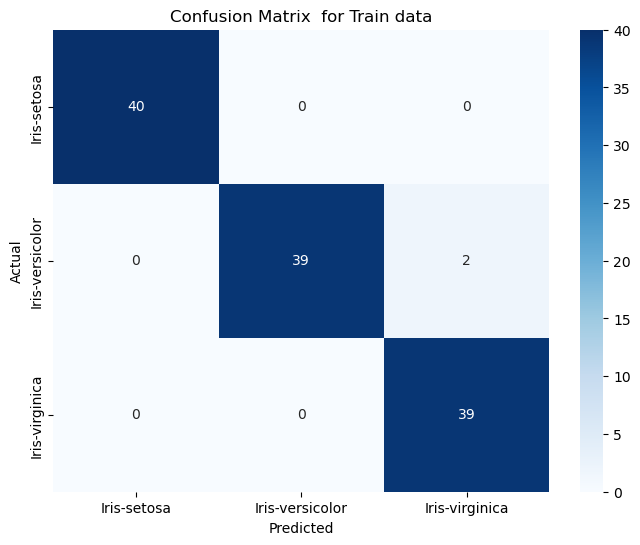

In [81]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train,y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix  for Train data')
plt.show()

# Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(multi_class='multinomial',solver='lbfgs',random_state=42)
lg.fit(x_train,y_train)
y_pred_test=lg.predict(x_test)
y_pred=lg.predict(x_train)

In [98]:
from sklearn.metrics import classification_report
print("Training data's evaluation metrics\n"+classification_report(y_train,y_pred))
print("Testing data's evaluation metrics\n"+classification_report(y_test,y_pred_test))

Training data's evaluation metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.93      0.96        41
           2       0.93      1.00      0.96        39

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.97       120
weighted avg       0.98      0.97      0.97       120

Testing data's evaluation metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



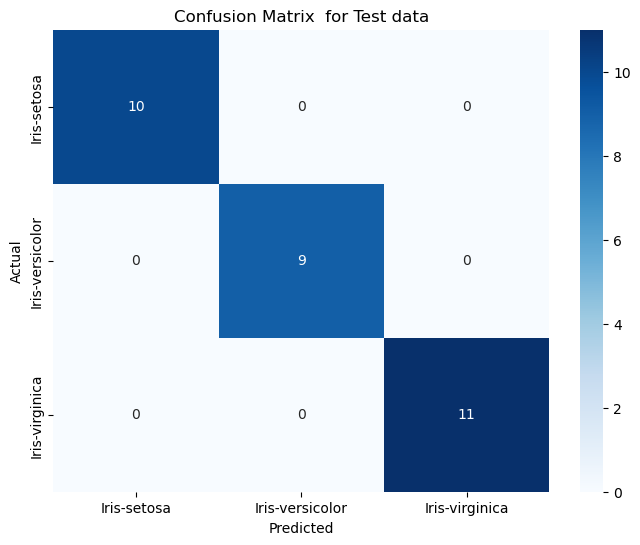

In [99]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True, fmt='d', cmap='Blues', xticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix  for Test data')
plt.show()

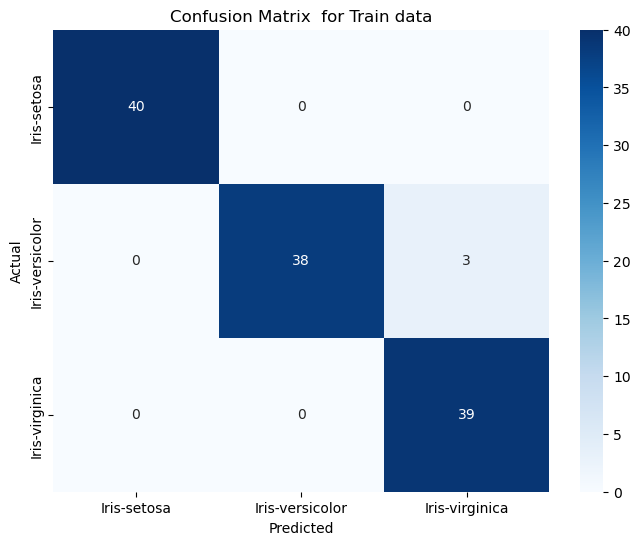

In [100]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train,y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix  for Train data')
plt.show()